DATA

In [2]:
import pandas as pd
import csv

data = pd.read_csv("jamb_exam_results.csv")
print(data.head)

<bound method NDFrame.head of       JAMB_Score  Study_Hours_Per_Week  Attendance_Rate  Teacher_Quality  \
0            192                    22               78                4   
1            207                    14               88                4   
2            182                    29               87                2   
3            210                    29               99                2   
4            199                    12               98                3   
...          ...                   ...              ...              ...   
4995         183                    20               74                2   
4996         179                     0               80                2   
4997         261                    17               89                3   
4998         183                    15               96                2   
4999         218                    34              100                1   

      Distance_To_School School_Type School_Location Extr

COUNT DATA

In [3]:
import pandas as pd
import csv

data = pd.read_csv("jamb_exam_results.csv")

frekuensi1 = data['Gender'].value_counts()
print(frekuensi1)

frekuensi2 = data['Parent_Involvement'].value_counts()
print(frekuensi2)

frekuensi3 = data['Socioeconomic_Status'].value_counts()
print(frekuensi3)

frekuensi4 = data['Parent_Education_Level'].value_counts()
print(frekuensi4)

print()

# Melihat jumlah data yang hilang di kolom Parent_Education_Level
missing = data['Gender'].isnull().sum()
print(f"Jumlah data yang hilang di Gender: {missing}")
missing = data['Parent_Involvement'].isnull().sum()
print(f"Jumlah data yang hilang di Parent_Involvement: {missing}")
missing = data['Socioeconomic_Status'].isnull().sum()
print(f"Jumlah data yang hilang di Socioeconomic_Status: {missing}")
missing = data['Parent_Education_Level'].isnull().sum()
print(f"Jumlah data yang hilang di Parent_Education_Level: {missing}")

print()

# missing value handling
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

mean_scores1 = data.groupby("Parent_Education_Level")["JAMB_Score"].mean()
mean_scores2 = data.groupby("Socioeconomic_Status")["JAMB_Score"].mean()
mean_scores3 = data.groupby("Parent_Involvement")["JAMB_Score"].mean()
mean_scores4 = data.groupby("Gender")["JAMB_Score"].mean()

print(mean_scores4)
print(mean_scores3)
print(mean_scores2)
print(mean_scores1)



Gender
Female    2530
Male      2470
Name: count, dtype: int64
Parent_Involvement
Medium    2012
Low       1877
High      1111
Name: count, dtype: int64
Socioeconomic_Status
Medium    1967
Low       1951
High      1082
Name: count, dtype: int64
Parent_Education_Level
Secondary    1556
Primary      1335
Tertiary     1218
Name: count, dtype: int64

Jumlah data yang hilang di Gender: 0
Jumlah data yang hilang di Parent_Involvement: 0
Jumlah data yang hilang di Socioeconomic_Status: 0
Jumlah data yang hilang di Parent_Education_Level: 891

Gender
Female    174.763241
Male      173.369231
Name: JAMB_Score, dtype: float64
Parent_Involvement
High      188.826283
Low       167.253063
Medium    172.292744
Name: JAMB_Score, dtype: float64
Socioeconomic_Status
High      190.744917
Low       164.772424
Medium    174.131164
Name: JAMB_Score, dtype: float64
Parent_Education_Level
Primary      169.112360
Secondary    176.573265
Tertiary     184.738095
Unknown      162.569024
Name: JAMB_Score, dtype: 

ANOVA

In [4]:
import pandas as pd
from scipy.stats import f_oneway

# Membaca data
data = pd.read_csv("jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')


# Mengonversi kolom tertentu menjadi tipe data kategori
categorical_columns = ['Gender', 'Parent_Involvement', 'Socioeconomic_Status', 'Parent_Education_Level']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Uji ANOVA untuk setiap variabel independen terhadap JAMB_Score
# Variabel 1: Gender
groups_gender = [data['JAMB_Score'][data['Gender'] == cat] for cat in data['Gender'].cat.categories]
f_stat_gender, p_value_gender = f_oneway(*groups_gender)

# Variabel 2: Parent_Involvement
groups_parent = [data['JAMB_Score'][data['Parent_Involvement'] == cat] for cat in data['Parent_Involvement'].cat.categories]
f_stat_parent, p_value_parent = f_oneway(*groups_parent)

# Variabel 3: Socioeconomic_Status
groups_socio = [data['JAMB_Score'][data['Socioeconomic_Status'] == cat] for cat in data['Socioeconomic_Status'].cat.categories]
f_stat_socio, p_value_socio = f_oneway(*groups_socio)

# Variabel 4: Parent_Education_Level
groups_edu = [data['JAMB_Score'][data['Parent_Education_Level'] == cat] for cat in data['Parent_Education_Level'].cat.categories]
f_stat_edu, p_value_edu = f_oneway(*groups_edu)

# Menampilkan hasil
print(f"Gender: F={f_stat_gender}, p={p_value_gender}")
print(f"Parent Involvement: F={f_stat_parent}, p={p_value_parent}")
print(f"Socioeconomic Status: F={f_stat_socio}, p={p_value_socio}")
print(f"Parent Education Level: F={f_stat_edu}, p={p_value_edu}")

Gender: F=1.0712013729757428, p=0.3007243155873339
Parent Involvement: F=76.21163905525485, p=2.491538848117176e-33
Socioeconomic Status: F=107.97024426459544, p=1.2416986871835047e-46
Parent Education Level: F=45.12716223949831, p=9.092668681182732e-29


HEATMAP

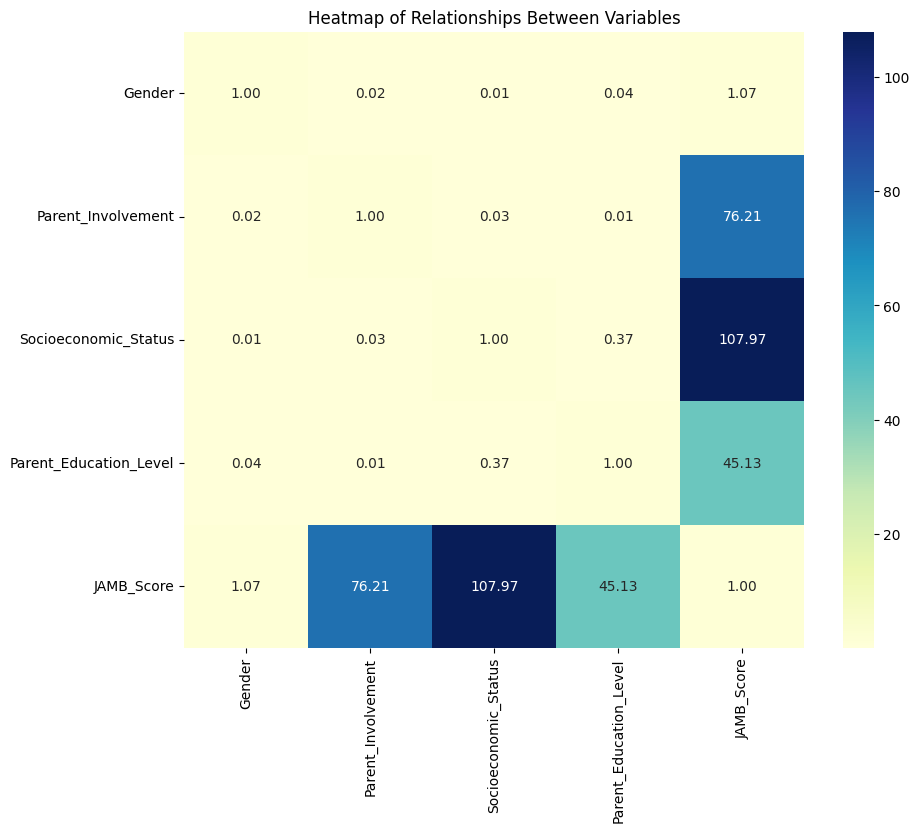

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, pearsonr, chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv("jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Helper function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# List of variables to analyze
variables = ['Gender', 'Parent_Involvement', 'Socioeconomic_Status',
             'Parent_Education_Level', 'JAMB_Score']

# Initialize an empty matrix for the heatmap
heatmap_matrix = np.zeros((len(variables), len(variables)))

# Calculate pairwise relationships
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i == j:  # Perfect correlation with itself
            heatmap_matrix[i, j] = 1.0
        elif var1 == 'JAMB_Score' or var2 == 'JAMB_Score':  # Numerical vs. Categorical
            if var1 == 'JAMB_Score':  # JAMB_Score vs Categorical
                groups = [data[data[var2] == level]['JAMB_Score']
                          for level in data[var2].unique()]
            else:  # Categorical vs JAMB_Score
                groups = [data[data[var1] == level]['JAMB_Score']
                          for level in data[var1].unique()]
            f_stat, _ = f_oneway(*groups)
            heatmap_matrix[i, j] = f_stat
        elif data[var1].dtype == 'object' and data[var2].dtype == 'object':  # Categorical vs Categorical
            heatmap_matrix[i, j] = cramers_v(data[var1], data[var2])
        elif data[var1].dtype != 'object' and data[var2].dtype != 'object':  # Numerical vs Numerical
            corr, _ = pearsonr(data[var1], data[var2])
            heatmap_matrix[i, j] = corr

# Convert matrix to DataFrame for better labeling
heatmap_df = pd.DataFrame(heatmap_matrix, index=variables, columns=variables)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Heatmap of Relationships Between Variables")
plt.show()


GRAFIK GENDER

C:\Users\Acer Z476\AppData\Local\Temp\ipykernel_11716\3411976821.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Gender", y="JAMB_Score", jitter=True, palette="viridis")


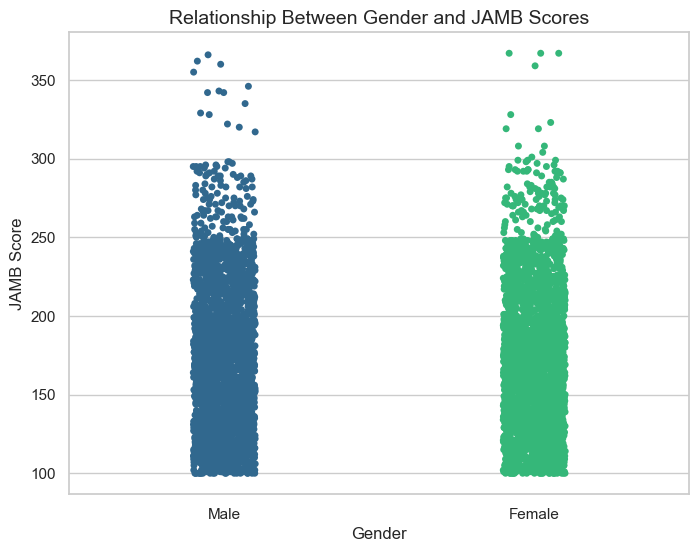

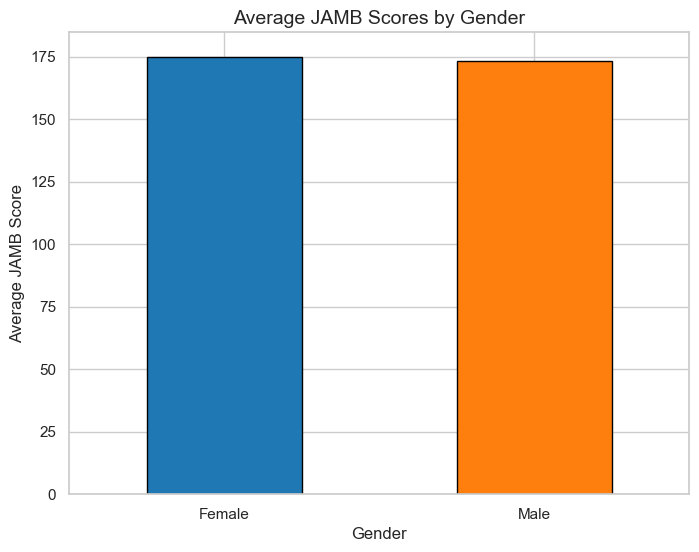

Gender
Female    174.763241
Male      173.369231
Name: JAMB_Score, dtype: float64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Gender", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Gender and JAMB Scores", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Gender")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores


GRAFIK PARENT INVOLVEMENT

C:\Users\Acer Z476\AppData\Local\Temp\ipykernel_11716\682943288.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Parent_Involvement", y="JAMB_Score", jitter=True, palette="viridis")


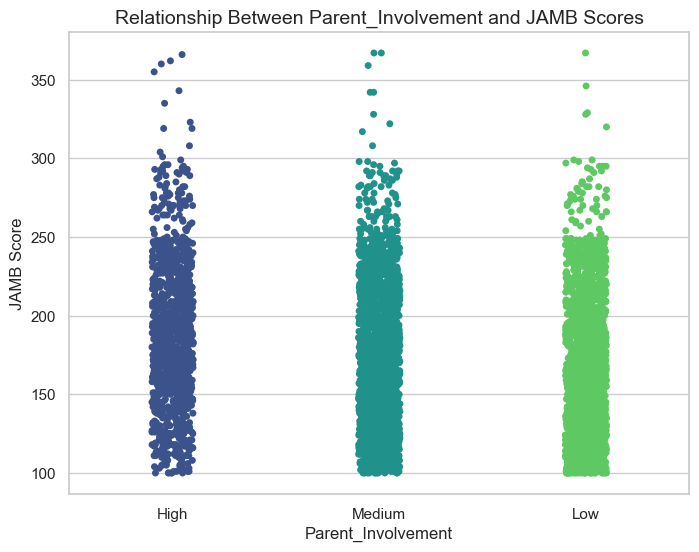

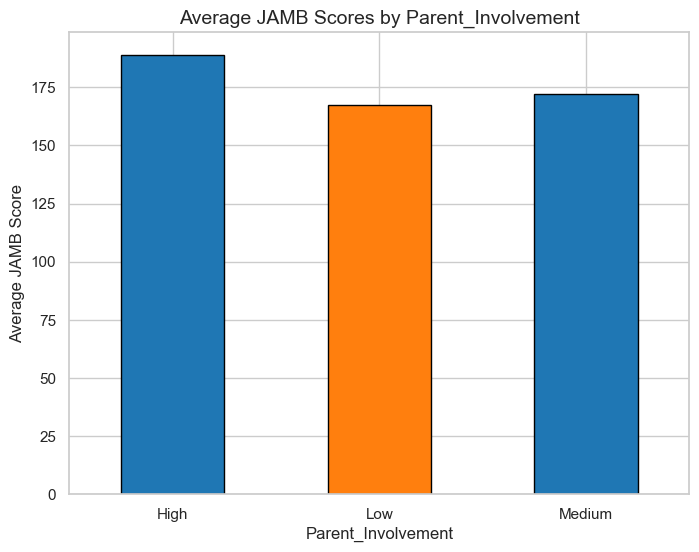

Parent_Involvement
High      188.826283
Low       167.253063
Medium    172.292744
Name: JAMB_Score, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Parent_Involvement", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Parent_Involvement and JAMB Scores", fontsize=14)
plt.xlabel("Parent_Involvement", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Parent_Involvement")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Parent_Involvement", fontsize=14)
plt.xlabel("Parent_Involvement", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores

GRAFIK SOCIOECONOMIC STATUS

C:\Users\Acer Z476\AppData\Local\Temp\ipykernel_11716\819502200.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Socioeconomic_Status", y="JAMB_Score", jitter=True, palette="viridis")


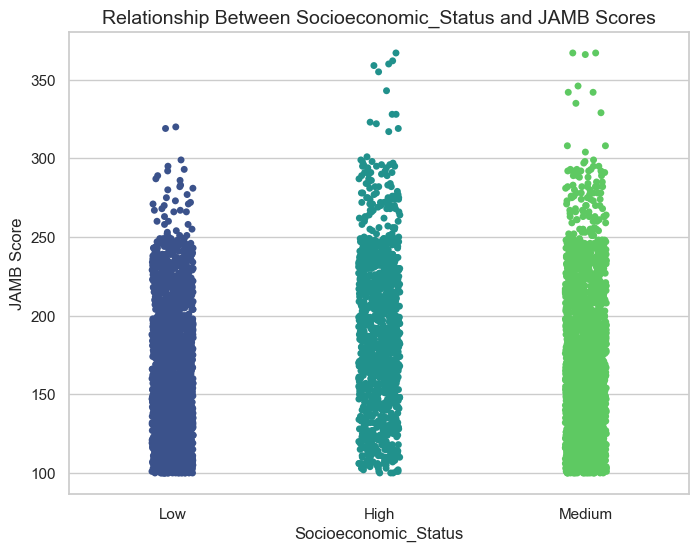

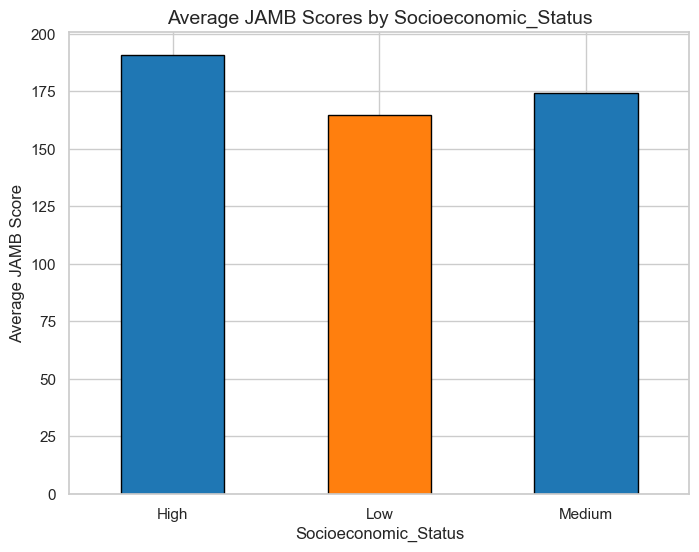

Socioeconomic_Status
High      190.744917
Low       164.772424
Medium    174.131164
Name: JAMB_Score, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv("jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Socioeconomic_Status", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Socioeconomic_Status and JAMB Scores", fontsize=14)
plt.xlabel("Socioeconomic_Status", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Socioeconomic_Status")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Socioeconomic_Status", fontsize=14)
plt.xlabel("Socioeconomic_Status", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores


GRAFIK PARENT EDUCATION LEVEL

C:\Users\Acer Z476\AppData\Local\Temp\ipykernel_11716\1989405373.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data, x="Parent_Education_Level", y="JAMB_Score", jitter=True, palette="viridis")


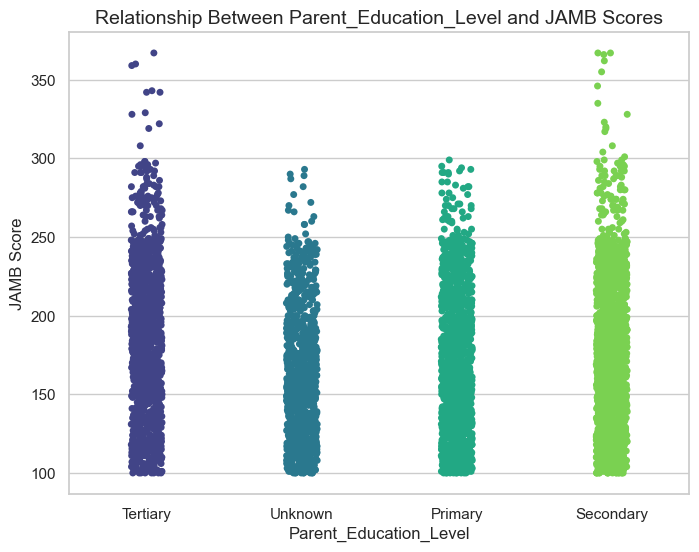

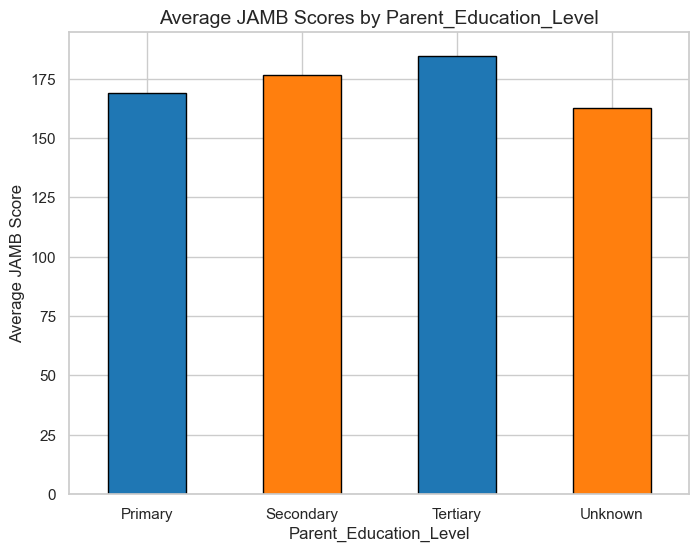

Parent_Education_Level
Primary      169.112360
Secondary    176.573265
Tertiary     184.738095
Unknown      162.569024
Name: JAMB_Score, dtype: float64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv("jamb_exam_results.csv")
data['Parent_Education_Level'] = data['Parent_Education_Level'].fillna('Unknown')

# Configure plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=data, x="Parent_Education_Level", y="JAMB_Score", jitter=True, palette="viridis")

# Add labels and title
plt.title("Relationship Between Parent_Education_Level and JAMB Scores", fontsize=14)
plt.xlabel("Parent_Education_Level", fontsize=12)
plt.ylabel("JAMB Score", fontsize=12)

# Display the plot
plt.show()

print("\n\n\n\n")

# Calculate mean JAMB scores by gender
mean_scores = data.groupby("Parent_Education_Level")["JAMB_Score"].mean()

# Create bar chart
plt.figure(figsize=(8, 6))
mean_scores.plot(kind="bar", color=["#1f77b4", "#ff7f0e"], edgecolor="black")

# Add labels and title
plt.title("Average JAMB Scores by Parent_Education_Level", fontsize=14)
plt.xlabel("Parent_Education_Level", fontsize=12)
plt.ylabel("Average JAMB Score", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, mean_scores.max() + 10)

# Display the bar chart
plt.show()

# Display the calculated averages
mean_scores
